<a href="https://colab.research.google.com/github/theForce-droid/AIandDeepLearning/blob/main/AIDL_Grp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI and Deep Learning - Assignment A
### Data Science and AI - Group 2
#### Group Members
##### 1. Ayush Gupta
##### 2. Manish Porwal
##### 3. Mukesh Kumar
##### 4. Shivani Gupta

---

### Focus Area: Computing with neural nets

#### Question 1: The figure below depicts a neural network. The inputs to the network are binary, namely 0 / 1. The weights and biases are as indicated. The activation function is a hardlim, which is 0 for all non-negative values (i.e. <= 0), and 1 otherwise.

#### 1. a.	Starting with every possible input pair (p1, p2), carefully write down all of the intermediate outputs, namely all of the n’s and a’s. (6 marks)

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q1Picture.png" width="400">


In [1]:
# Define hardlim activation (1 if net > 0 else 0)
def hardlim(x):
    return 1 if x > 0 else 0

# All possible binary input pairs (p1, p2)
inputs = [(0,0), (0,1), (1,0), (1,1)]

print(f"{'p1':<3}{'p2':<3}{'n1_1':<7}{'n1_2':<7}{'a1_1':<6}{'a1_2':<6}{'n2_1':<7}{'a2_1':<6}")
print("-"*50)

for p1, p2 in inputs:
    # Hidden neuron 1
    n1_1 = 2*p1 + 2*p2 - 1
    a1_1 = hardlim(n1_1)

    # Hidden neuron 2
    n1_2 = -p1 - p2 + 1.5
    a1_2 = hardlim(n1_2)

    # Output neuron
    n2_1 = a1_1 + a1_2 - 1.5
    a2_1 = hardlim(n2_1)

    # Print results
    print(f"{p1:<3}{p2:<3}{n1_1:<7.2f}{n1_2:<7.2f}{a1_1:<6}{a1_2:<6}{n2_1:<7.2f}{a2_1:<6}")


p1 p2 n1_1   n1_2   a1_1  a1_2  n2_1   a2_1  
--------------------------------------------------
0  0  -1.00  1.50   0     1     -0.50  0     
0  1  1.00   0.50   1     1     0.50   1     
1  0  1.00   0.50   1     1     0.50   1     
1  1  3.00   -0.50  1     0     -0.50  0     


#### 1. b.	Build the truth table of this network, by gathering the various combinations of inputs and outputs in a single table. (2 marks)

#### Truth Table of the Neural Network

| **p₁** | **p₂** | **a₂¹ (Output)** |
|:------:|:------:|:----------------:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |


#### 1. c.	What goal does this network accomplish? Explain. (2 marks)

##### This neural network implements the **XOR (exclusive OR)** logical function.

##### **Explanation**

- The **first hidden neuron** behaves like an **OR gate** — it outputs **1** when at least one input is **1**.  
- The **second hidden neuron** behaves like a **NAND gate** — it outputs **1** unless both inputs are **1**.  
- The **output neuron** performs an **AND operation** on these two results.

##### **Overall Behavior**

The final output is **1** only when exactly one of the two inputs is **1**, and **0** otherwise — which matches the **truth table of the XOR function**.

**Hence, this network successfully models the XOR logic operation.**


#### 1. d.	Replace the hardlim activations in the first layer by linear activations (y = x). Again, derive the final outputs by varying the inputs (p1, p2), and present your findings as a truth table. (5 marks)

In [2]:
# Define hardlim activation for the output neuron
def hardlim(x):
    return 1 if x > 0 else 0

# All possible binary input pairs
inputs = [(0,0), (0,1), (1,0), (1,1)]

print(f"{'p1':<3}{'p2':<3}{'n1_1':<7}{'n1_2':<7}{'a1_1':<7}{'a1_2':<7}{'n2_1':<7}{'a2_1(Output)':<15}")
print("-"*70)

for p1, p2 in inputs:
    # Hidden layer with LINEAR activations (y = x)
    n1_1 = 2*p1 + 2*p2 - 1
    a1_1 = n1_1             # linear activation

    n1_2 = -p1 - p2 + 1.5
    a1_2 = n1_2             # linear activation

    # Output layer still uses hardlim
    n2_1 = a1_1 + a1_2 - 1.5
    a2_1 = hardlim(n2_1)

    # Print results
    print(f"{p1:<3}{p2:<3}{n1_1:<7.2f}{n1_2:<7.2f}{a1_1:<7.2f}{a1_2:<7.2f}{n2_1:<7.2f}{a2_1:<15}")



p1 p2 n1_1   n1_2   a1_1   a1_2   n2_1   a2_1(Output)   
----------------------------------------------------------------------
0  0  -1.00  1.50   -1.00  1.50   -1.00  0              
0  1  1.00   0.50   1.00   0.50   0.00   0              
1  0  1.00   0.50   1.00   0.50   0.00   0              
1  1  3.00   -0.50  3.00   -0.50  1.00   1              


#### Conclusion: With linear activations in the hidden layer, the network outputs 0, 0, 0, 1 → effectively an AND gate, not XOR.

---

#### 2. We make the following stipulations:

- All activations for neurons in the hidden layers are ReLU
- The output neuron simply sums up its inputs (i.e. linear activation)
- All biases are zero

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q2Picture.png" width="400">

#### 2. a.	Label all the weights in the network in whichever way you see convenient. Source a screenshot with these annotations into your notebook. (2 marks)

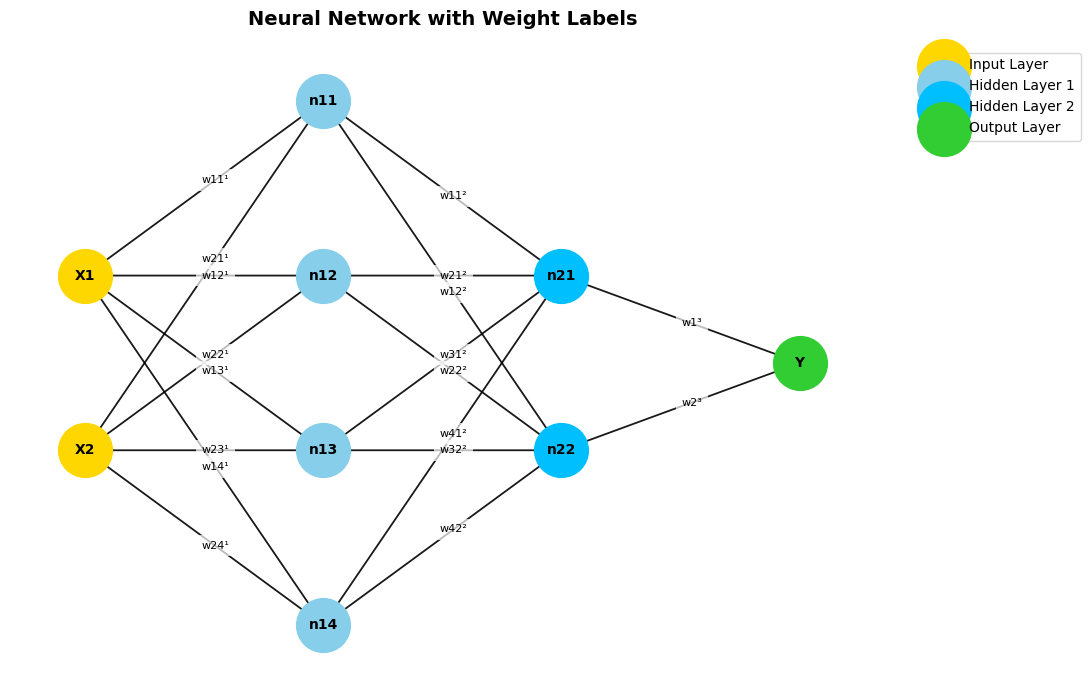

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Define nodes for each layer
inputs = ["X1", "X2"]
hidden1 = ["n11", "n12", "n13", "n14"]
hidden2 = ["n21", "n22"]
output = ["Y"]

# Add all nodes
G.add_nodes_from(inputs + hidden1 + hidden2 + output)

# --- Define connections (edges) with labels for weights ---
edge_labels = {}

# Input -> Hidden Layer 1
for i, x in enumerate(inputs, start=1):
    for j, n in enumerate(hidden1, start=1):
        w_label = f"w{i}{j}¹"
        G.add_edge(x, n)
        edge_labels[(x, n)] = w_label

# Hidden Layer 1 -> Hidden Layer 2
for i, n1 in enumerate(hidden1, start=1):
    for j, n2 in enumerate(hidden2, start=1):
        w_label = f"w{i}{j}²"
        G.add_edge(n1, n2)
        edge_labels[(n1, n2)] = w_label

# Hidden Layer 2 -> Output
for i, n2 in enumerate(hidden2, start=1):
    w_label = f"w{i}³"
    G.add_edge(n2, "Y")
    edge_labels[(n2, "Y")] = w_label

# --- Define positions for a layered layout ---
pos = {
    "X1": (-3, 1),
    "X2": (-3, -1),
    "n11": (-1, 3),
    "n12": (-1, 1),
    "n13": (-1, -1),
    "n14": (-1, -3),
    "n21": (1, 1),
    "n22": (1, -1),
    "Y": (3, 0)
}

# --- Draw network ---
plt.figure(figsize=(11, 7))
nx.draw_networkx_nodes(G, pos, nodelist=inputs, node_color="gold", node_size=1500, label="Input Layer")
nx.draw_networkx_nodes(G, pos, nodelist=hidden1, node_color="skyblue", node_size=1500, label="Hidden Layer 1")
nx.draw_networkx_nodes(G, pos, nodelist=hidden2, node_color="deepskyblue", node_size=1500, label="Hidden Layer 2")
nx.draw_networkx_nodes(G, pos, nodelist=output, node_color="limegreen", node_size=1500, label="Output Layer")

# Draw edges (straight lines)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12, width=1.3, alpha=0.9)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Draw edge labels with white background for clarity
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=8, rotate=False, label_pos=0.55,
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
)

# Title and layout adjustments
plt.title("Neural Network with Weight Labels", fontsize=14, fontweight="bold", pad=15)
plt.axis("off")

# Move legend outside to avoid overlap
plt.legend(scatterpoints=1, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


#### 2. b.	Construct the matrices of weights, with random values populating them. The final weights to the output neuron will be named Beta_1 and Beta_2. (3 marks)

In [4]:
import numpy as np

# For reproducibility
np.random.seed(42)

# --- Weight matrices ---
# Input (2) → Hidden Layer 1 (4)
W1 = np.random.randn(4, 2)

# Hidden Layer 1 (4) → Hidden Layer 2 (2)
W2 = np.random.randn(2, 4)

# Hidden Layer 2 (2) → Output (1)
Beta_1 = np.random.randn()  # from n21 → Y
Beta_2 = np.random.randn()  # from n22 → Y

print("W1 (Input → Hidden Layer 1):")
print(W1)

print("\nW2 (Hidden Layer 1 → Hidden Layer 2):")
print(W2)

print("\nFinal Output Weights:")
print(f"Beta_1 (n21 → Y): {Beta_1:.4f}")
print(f"Beta_2 (n22 → Y): {Beta_2:.4f}")

W1 (Input → Hidden Layer 1):
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]]

W2 (Hidden Layer 1 → Hidden Layer 2):
[[-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]

Final Output Weights:
Beta_1 (n21 → Y): -1.0128
Beta_2 (n22 → Y): 0.3142


#### 2. c.	For the following inputs, create the outputs for your random weights in Python, by defining a function. (3 marks)

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q2cPicture.png" width="200">

In [5]:
import numpy as np
import pandas as pd

# -------------------
# Random Weights
# -------------------
np.random.seed(42)

# Input (2) → Hidden Layer 1 (4)
W1 = np.random.randn(4, 2)

# Hidden Layer 1 (4) → Hidden Layer 2 (2)
W2 = np.random.randn(2, 4)

# Hidden Layer 2 (2) → Output
Beta_1 = np.random.randn()
Beta_2 = np.random.randn()

# -------------------
# Activation functions
# -------------------
def relu(x):
    return np.maximum(0, x)

def linear(x):
    return x

# -------------------
# Forward propagation
# -------------------
def forward_pass(x1, x2):
    # Input vector
    x = np.array([x1, x2])

    # ---- Layer 1 ----
    net1 = W1 @ x             # (4x2) dot (2,) → (4,)
    a1 = relu(net1)

    # ---- Layer 2 ----
    net2 = W2 @ a1            # (2x4) dot (4,) → (2,)
    a2 = relu(net2)

    # ---- Output Layer (linear) ----
    y = Beta_1 * a2[0] + Beta_2 * a2[1]
    return y

# -------------------
# Input data from your table
# -------------------
inputs = np.array([
    [1, 1],
    [1, 2],
    [1, 4],
    [2, 3],
    [2, 5],
    [2, 4],
    [2, 1],
    [3, 1],
    [3, 2],
    [3, 4]
])

# -------------------
# Compute outputs
# -------------------
outputs = [forward_pass(x1, x2) for x1, x2 in inputs]

# Create a results table
df = pd.DataFrame(inputs, columns=["X1", "X2"])
df["Output (Y)"] = np.round(outputs, 4)

# -------------------
# Display results
# -------------------
print("Random Weights:")
print(f"W1 = \n{np.round(W1, 4)}\n")
print(f"W2 = \n{np.round(W2, 4)}\n")
print(f"Beta_1 = {Beta_1:.4f}, Beta_2 = {Beta_2:.4f}\n")

df.style.format(precision=4).set_caption("Network Outputs for Given Inputs")

Random Weights:
W1 = 
[[ 0.4967 -0.1383]
 [ 0.6477  1.523 ]
 [-0.2342 -0.2341]
 [ 1.5792  0.7674]]

W2 = 
[[-0.4695  0.5426 -0.4634 -0.4657]
 [ 0.242  -1.9133 -1.7249 -0.5623]]

Beta_1 = -1.0128, Beta_2 = 0.3142



,X1,X2,Output (Y)
0,1,1,0.0000
1,1,2,-0.4562
2,1,4,-1.5107
3,2,3,-0.3717
4,2,5,-1.4530
5,2,4,-0.9123
6,2,1,0.0000
7,3,1,0.0000
8,3,2,0.0000
9,3,4,-0.2871


#### 2. d.	Use scikit-learn’s regressor to cast the output Y as a linear regression of its inputs. What are Beta_1 and Beta_2?

<img src="https://raw.githubusercontent.com/theForce-droid/AIandDeepLearning/main/Q2dPicture.png" width="250">

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# -------------------
# Input data
# -------------------
data = {
    "X1": [1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
    "X2": [1, 2, 4, 3, 5, 4, 1, 1, 2, 4],
    "Y":  [1.1, 1.8, 3.0, 2.9, 4.2, 3.5, 1.6, 2.1, 2.8, 4.0]
}

df = pd.DataFrame(data)

# -------------------
# Define inputs and output
# -------------------
X = df[["X1", "X2"]]
y = df["Y"]

# -------------------
# Train Linear Regression model
# -------------------
model = LinearRegression()
model.fit(X, y)

# -------------------
# Extract coefficients
# -------------------
Beta_1, Beta_2 = model.coef_
intercept = model.intercept_

# -------------------
# Display results
# -------------------
print(f"Beta_1 = {Beta_1:.4f}")
print(f"Beta_2 = {Beta_2:.4f}")
print(f"Intercept = {intercept:.4f}")


Beta_1 = 0.5000
Beta_2 = 0.6368
Intercept = -0.0194


#### 2. e.	Use Keras with Tensorflow to set up the neural network. (3 marks)

In [8]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(4, input_dim=2, activation='relu', name='Hidden_Layer_1'),  # n11–n14
    Dense(2, activation='relu', name='Hidden_Layer_2'),               # n21–n22
    Dense(1, activation='linear', name='Output_Layer')                # Y (no activation → linear)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

#### 2. f.	Solve the regression problem – you will not need a GPU! State the final betas (3 marks)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

# reproducible
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# --- dataset ---
data = {
    'X1': [1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
    'X2': [1, 2, 4, 3, 5, 4, 1, 1, 2, 4],
    'Y' : [1.1,1.8,3.0,2.9,4.2,3.5,1.6,2.1,2.8,4.0]
}
df = pd.DataFrame(data)
X = df[['X1','X2']].values.astype(float)
y = df['Y'].values.astype(float)

# --- model (no biases anywhere) ---
model = Sequential([
    Dense(4, input_dim=2, activation='relu', use_bias=False, name='Hidden_Layer_1'),
    Dense(2, activation='relu', use_bias=False, name='Hidden_Layer_2'),
    Dense(1, activation='linear', use_bias=False, name='Output_Layer')
])

# compile & train
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)

# --- extract weights ---
# Output layer weights have shape (2,1)  -> Beta_1 = weight from n21 -> Y, Beta_2 = weight from n22 -> Y
output_weights = model.get_layer('Output_Layer').get_weights()[0]  # shape (2,1)
Beta_1 = float(np.round(output_weights[0,0], 4))
Beta_2 = float(np.round(output_weights[1,0], 4))

# print results nicly
print("Trained model (no biases). Final output-layer weights:")
print(f"Beta_1 (n21 -> Y) = {Beta_1:.4f}")
print(f"Beta_2 (n22 -> Y) = {Beta_2:.4f}\n")

# show layer-wise weights (rounded)
for layer in model.layers:
    w = layer.get_weights()[0]
    print(f"Layer {layer.name} weights (shape {w.shape}):\n{np.round(w,4)}\n")

# predictions and R^2
y_pred = model.predict(X).flatten()
df['Predicted_Y'] = np.round(y_pred,4)
print("Predictions:")
print(df.to_string(index=False))

print(f"\nFinal training MSE: {history.history['loss'][-1]:.6f}")
print(f"R^2 score: {r2_score(y, y_pred):.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trained model (no biases). Final output-layer weights:
Beta_1 (n21 -> Y) = -0.8788
Beta_2 (n22 -> Y) = 0.7964

Layer Hidden_Layer_1 weights (shape (2, 4)):
[[ 0.4748  0.2553 -0.9695  0.3366]
 [ 0.7003  0.1088 -0.2336  0.2188]]

Layer Hidden_Layer_2 weights (shape (4, 2)):
[[-0.0037  1.0243]
 [-1.1526  0.1377]
 [-0.4499  0.7029]
 [-0.9384  0.2945]]

Layer Output_Layer weights (shape (2, 1)):
[[-0.8788]
 [ 0.7964]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predictions:
 X1  X2   Y  Predicted_Y
  1   1 1.1       1.1288
  1   2 1.8       1.7633
  1   4 3.0       3.0323
  2   3 2.9       2.8921
  2   5 4.2       4.1611
  2   4 3.5       3.5266
  2   1 1.6       1.6231
  3   1 2.1       2.1173
  3   2 2.8       2.7518
  3   4 4.0       4.0209

Final training MSE: 0.000909
R^2 score: 0.9991
